#### Check jpg, png read in pixel scaler
#plt.imread 特有的現象會把png 讀成0~1

In [16]:
# import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [9]:
def decode_crop_png_toe(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_toe(file_path,x1,y1,x2,y2):
    file_path = im_p + file_path
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_toe(img)
    return img, [x1,y1-y_offset_toe]#Original [0,120]

tf.io 
 image_0363.png: 0, 255
tf.io 
 image_0958.png: 0, 255
tf.io 
 image_6244.jpg: 0, 255


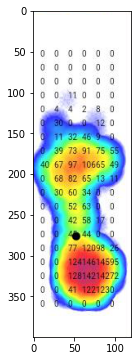

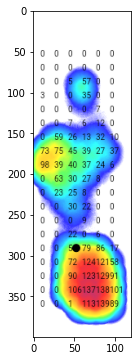

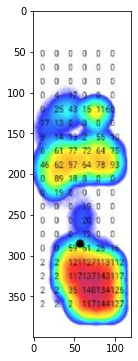

In [12]:
for sample in ['image_0363.png', 'image_0958.png', 'image_6244.jpg']: # ['image_0363.png', 'image_0958.png', 'image_6244.jpg']
    img_path = 'train/images/' + sample
    
    img = tf.io.read_file(img_path)
    img = tf.io.decode_png(img, channels=3)
    print(f'tf.io \n {sample}: {img.numpy().min()}, {img.numpy().max()}')
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(img)

tf.io 
 image_0363.png: 0.0, 1.0
tf.io 
 image_0958.png: 0.0, 1.0
tf.io 
 image_6244.jpg: 0, 255


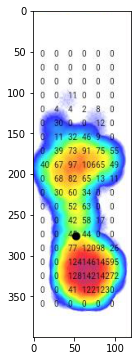

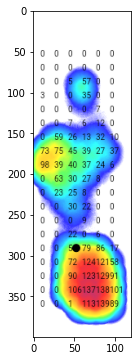

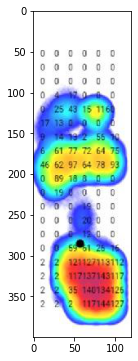

In [15]:
for sample in ['image_0363.png', 'image_0958.png', 'image_6244.jpg']: # ['image_0363.png', 'image_0958.png', 'image_6244.jpg']
    img_path = 'train/images/' + sample
    
    img = plt.imread(img_path)
    print(f'tf.io \n {sample}: {img.min()}, {img.max()}')
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(img)